# Useful resources:
- [Essentials of Linear Regression in Python](https://www.datacamp.com/community/tutorials/essentials-linear-regression-python)

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets
from sklearn import linear_model

sns.set_style("white")
%matplotlib inline

In [51]:
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
df = pd.DataFrame(data.data, columns = data.feature_names)

target = pd.DataFrame(data.target, columns = ["MEDV"])

## Considerations

- **Linear Assumption**: Linear regression is best employed to capture the relationship between the input variables and the outputs. In order to do so, linear regression assumes this relationship to be **linear** (which might not be the case all the time). But you can always transform your data so that a linear relationship is maintained

- **Collinearity between the features**: Collinearity is a measure to calculate the importance of a feature of a dataset mathematically. When you have a dataset in which the features are very correlated to each other, linear regression fails to approximate the relationship appropriately and tends to overfit. So, it is efficient to detect the highly correlated features and to drop them before you apply linear regression

## Modelling - statsmodels

In [89]:
# first we only use RM, the average number of rooms as a feature
X = df["LSTAT"]
y = target["MEDV"]

In [90]:
# fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                    2.71e-67
Time:                        21:06:36   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

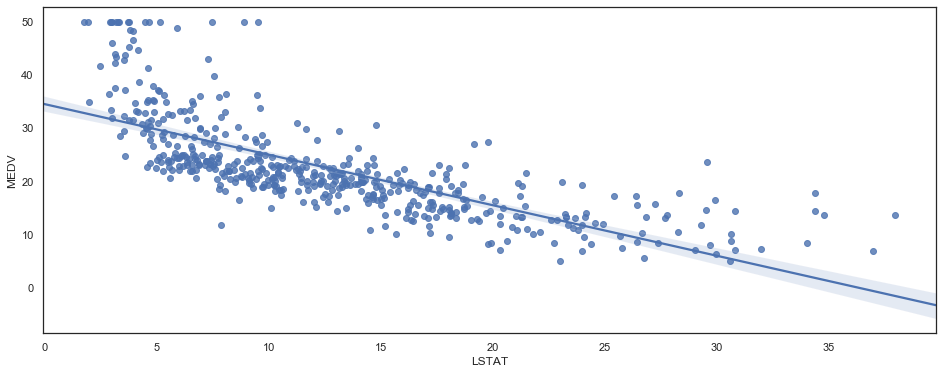

In [86]:
# drawing regression using sns.regplot
plt.figure(figsize = (16, 6))
sns.regplot(x = X, y = y)
plt.show()

In [26]:
# add a constant term to the liner regression model
X = sm.add_constant(X)

model_2 = sm.OLS(y, X).fit()
predictions_2 = model_2.predict()

In [27]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           2.49e-74
Time:                        17:54:34   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Now fitting the regression with more than one variable
X = df[["RM", "LSTAT"]]

In [29]:
model_3 = sm.OLS(y, X).fit()
predictions_3 = model_3.predict()

In [31]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                        0.00
Time:                        17:56:31   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelling - scikit-learn

In [33]:
X = df

In [34]:
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

In [35]:
predictions = lm.predict(X)
print(predictions[0:5])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


In [45]:
R_squared = lm.score(X, y)
print(f"R-squared is {R_squared}")

R-squared is 0.7406426641094095


In [44]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [136]:
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(111)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2)) # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color = 'r', linewidth = 2.5)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd

def qq_plot(residuals):
    sm.qqplot(residuals, dist = "norm", line = "r")

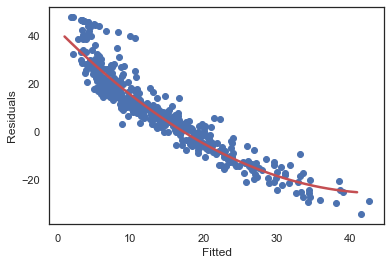

In [137]:
fitted = predictions
residuals = y - fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(predictions, residuals, "Fitted", "Residuals")

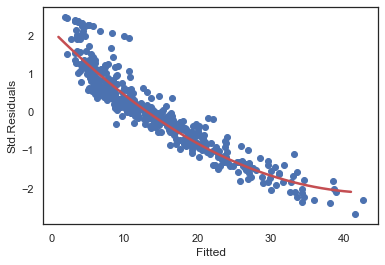

In [138]:
residuals_vs_fitted(predictions, std_residuals, "Fitted", "Std.Residuals")

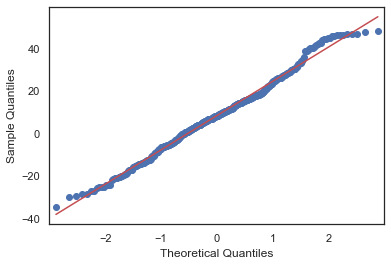

In [128]:
qq_plot(residuals)
plt.show()

## Nonlinear Terms and Interactions

In [139]:
# fitting medv ~ lstat * age
df["LSTAT*AGE"] = df.LSTAT * df.AGE

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT*AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,324.696
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,721.146
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,246.233
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,134.652
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,288.886


In [147]:
X = df[["LSTAT", "AGE", "LSTAT*AGE"]]
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

In [148]:
(model.intercept_, model.coef_)

(36.08853593461289, array([-1.39211684e+00, -7.20859509e-04,  4.15595185e-03]))

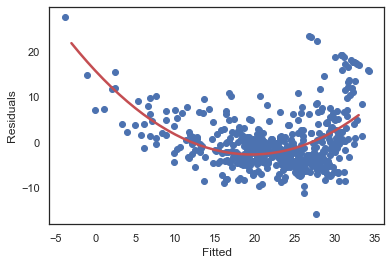

In [150]:
predictions = model.predict(X)
residuals = y - predictions
residuals_vs_fitted(predictions, residuals, "Fitted", "Residuals")